In [451]:
# to IO/manipulate/calculate dataframes
import pandas as pd
import numpy as np

# to do math/statisctics
import statistics as stat
import math

# to vitualize data
import matplotlib.pyplot as plt
import seaborn as sns


# to do modeling with sklrean
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# other packages
import warnings
warnings.filterwarnings(action='ignore')

##  FUNCTION:  Replace the Null elements with the column's mean

In [452]:
def replace_null_with_mean(data, feature_list):
    """
    Calculate the mean of each column in a dataset and replace nulls with the column's mean
    """
    [ data[feature].fillna(data[feature].mean(),inplace=True) for feature in feature_list ]

## FUNCTION: Replace the Null elements with the column's mean

In [453]:
def replace_null_with_mode(data, feature_list):
    """
    1. To find the most frequent element in the column with object type
    2. Replace the np.nan with the mode
    """
    [data[feature].fillna(stat.mode(data[feature]), inplace=True) for feature in feature_list]

In [454]:
def print_dataset(data):
    with pd.option_context('display.max_rows', 7, 'display.max_columns', None): 
        display(data)    

## FUNCTION: plot_boxplot_category

# FUNCTION: plot_scatter_values

In [455]:
def plot_scatter_values(data, category_features=None, remove_zeros=False):
    if category_features==None:
        category_features = [col for col in dataset.columns if data[col].dtype==np.float64]
    size_title=26
    size_subtitle=14
    size_label_xy=15
    sns.set(style="white")

    fig, axes = plt.subplots(nrows=int(len(category_features)/3), ncols=3,
                             figsize=(12, int(2*len(category_features))))
    # fig.subplots_adjust(hspace=4)
#     fig.suptitle('Train Dataset\n\n\n', fontsize=size_title,  fontweight='bold')

    for ax, feature in zip(axes.flatten(), data[category_features]):
#         if remove_zeros==True:
#             dataset=dataset[dataset[feature]>0]
        sns.scatterplot(ax=ax, y=data[feature], x=data['SalePrice']/1000)
#         sns.kdeplot(ax=ax, y=dataset[feature], x=dataset['sale_price']/1000,
#                     n_levels=3, cmap='PiYG', thresh=0.5)
        
        ax.tick_params(axis='both', labelsize=size_label_xy)
        ax.set_title(feature.upper().replace('_',' '), fontsize=18,  fontweight='bold')
        ax.set_ylabel(' ',fontsize=size_label_xy)
        ax.set_xlabel('Sale Price k[$]',fontsize=size_label_xy)
        ax.set(xlim=(0, 600), ylim=None)
        ax.grid(b=True, which='major', axis='both')

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    plt.tight_layout();
    # plt.savefig('seaborn-style.svg', bbox_inches='tight')

In [456]:
def plot_boxplot_category(data, category_features=None):
    if category_features==None:
        category_features = [col for col in data.columns if data[col].dtype==np.object_]
    size_title=26
    size_subtitle=14
    size_label_xy=15
    sns.set(style="white")

    fig, axes = plt.subplots(nrows=int(1+len(category_features)/3), ncols=3,
                             figsize=(12, int(1.5*len(category_features))))
    # fig.subplots_adjust(hspace=4)
#     fig.suptitle('Train Dataset\n\n\n', fontsize=size_title,  fontweight='bold')

    for ax, feature in zip(axes.flatten(), data[category_features]):
        my_order = data.groupby(by=[feature])['SalePrice'].mean().sort_values().index
        sns.boxplot(ax=ax, y=data[feature], x=data['SalePrice']/1000, order=list(my_order[::-1]))
        ax.tick_params(axis='both', labelsize=size_label_xy)
        ax.set_title(feature.upper().replace('_',' '), fontsize=18,  fontweight='bold')
        ax.set_ylabel(' ',fontsize=size_label_xy)
        ax.set_xlabel('Sale Price k[$]',fontsize=size_label_xy)
        ax.set(xlim=(0, 600), ylim=None)
        ax.grid(b=True, which='major', axis='both')

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    plt.tight_layout();
    # plt.savefig('seaborn-style.svg', bbox_inches='tight')

In [457]:
def check_nulls(data):
    """
    This function read the dataset and report the following:
    1. column names with null
    2. null count 
    3. null count % 
    4. the first 10 element of each
    """
    xlist=[]
    for col in data.columns:
        number_of_nulls = data[col].isnull().sum()
#         print(col,number_of_nulls)
        if number_of_nulls!=0:
            xlist.append((col,number_of_nulls,
                          round(number_of_nulls*100/len(data),1) ,data[col][0:10].values))
    null_data = pd.DataFrame(data=xlist,columns=['column name','null count',
                                            'null count %','values example'])
    return null_data

## FUNCTION: print_dataset_Type

In [458]:
def print_dataset_type(data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(data.dtypes)

# Read Train dataset ===========================================================

In [459]:
dataset = pd.read_csv('../datasets/train.csv')

In [460]:
print_dataset(dataset)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,155.0,LwQ,750.0,295.0,1200.0,GasA,TA,Y,SBrkr,1200,0,0,1200,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1956.0,Unf,1.0,294.0,TA,TA,Y,0,189,140,0,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,GasA,Gd,Y,SBrkr,1028,776,0,1804,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1999.0,Fin,2.0,442.0,TA,TA,Y,140,60,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


In [461]:
# check_nulls(dataset)

In [462]:
# dataset['SalePrice'].sort_values(ascending=False)[0:20]

In [463]:
# dataset = dataset[(dataset['SalePrice']>30000) & dataset['SalePrice']<500000]['SalePrice']


# Features Classification: ===========================================================

# Features: Continous & numeric ===========================================================

In [464]:
features_continous_numeric = [
    'Lot Frontage',
    'Lot Area',
    'Mas Vnr Area',
    'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
    '1st Flr SF', '2nd Flr SF',
    'Low Qual Fin SF',
    'Gr Liv Area', 
    'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
    '3Ssn Porch', 'Screen Porch',
    'Pool Area', 
    'Misc Val',
    
]


In [465]:
check_nulls(dataset[features_continous_numeric])

,column name,null count,null count %,values example
0,Lot Frontage,330,16.1,"[nan, 43.0, 68.0, 73.0, 82.0, 137.0, 35.0, nan..."
1,Mas Vnr Area,22,1.1,"[289.0, 132.0, 0.0, 0.0, 0.0, 0.0, 82.0, 180.0..."
2,BsmtFin SF 1,1,0.0,"[533.0, 637.0, 731.0, 0.0, 0.0, 247.0, 547.0, ..."
3,BsmtFin SF 2,1,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 713.0, 0.0, 0.0, 0.0..."
4,Bsmt Unf SF,1,0.0,"[192.0, 276.0, 326.0, 384.0, 676.0, 557.0, 0.0..."
5,Total Bsmt SF,1,0.0,"[725.0, 913.0, 1057.0, 384.0, 676.0, 1517.0, 5..."


In [466]:
replace_null_with_mean(dataset , ['Lot Frontage','Mas Vnr Area'])

In [467]:
null = check_nulls(dataset[features_continous_numeric])
null

,column name,null count,null count %,values example
0,BsmtFin SF 1,1,0.0,"[533.0, 637.0, 731.0, 0.0, 0.0, 247.0, 547.0, ..."
1,BsmtFin SF 2,1,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 713.0, 0.0, 0.0, 0.0..."
2,Bsmt Unf SF,1,0.0,"[192.0, 276.0, 326.0, 384.0, 676.0, 557.0, 0.0..."
3,Total Bsmt SF,1,0.0,"[725.0, 913.0, 1057.0, 384.0, 676.0, 1517.0, 5..."


In [468]:
# drop nulls < 30 
dataset.dropna(subset=null[null['null count'] < 30]['column name'], inplace = True)

In [469]:
check_nulls(dataset[features_continous_numeric])

,column name,null count,null count %,values example


In [470]:
# plot features_continous_numeric

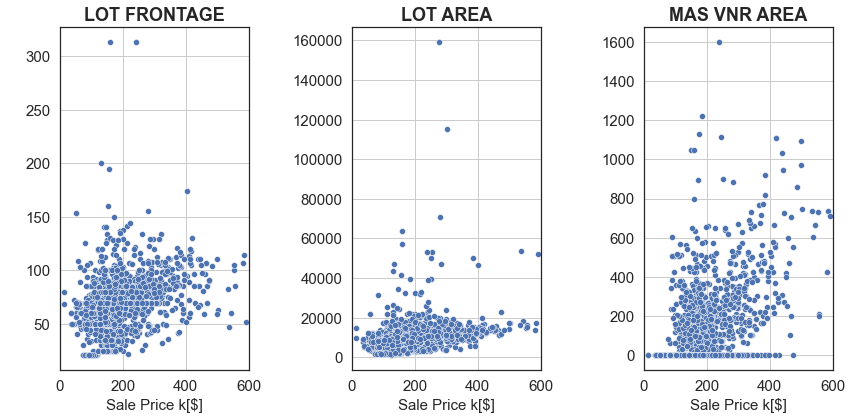

In [471]:
plot_scatter_values(dataset , features_continous_numeric[0:3])

In [472]:
# drop outliars
dataset = dataset[dataset['Lot Frontage'] < 150]
dataset = dataset[dataset['Lot Area'] < 20000]
dataset = dataset[dataset['Mas Vnr Area'] < 1000]

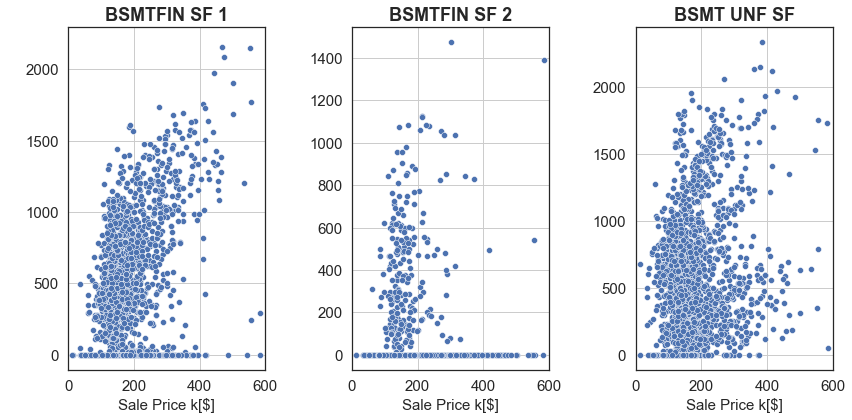

In [473]:
plot_scatter_values(dataset , features_continous_numeric[3:6])

In [474]:
dataset = dataset[dataset['SalePrice'] > 1000]

In [475]:
# drop outliars
dataset = dataset[dataset['BsmtFin SF 2'] < 1300]
dataset = dataset[dataset['Bsmt Unf SF'] < 2000]

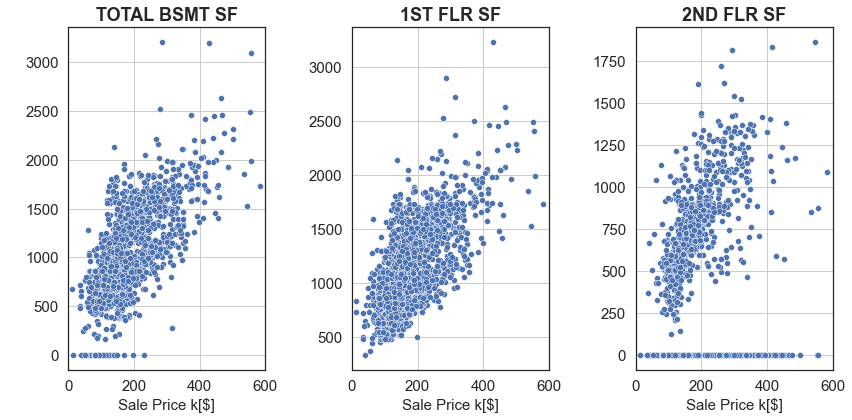

In [476]:
plot_scatter_values(dataset , features_continous_numeric[6:9])

In [477]:
# drop outliars
dataset = dataset[dataset['Total Bsmt SF'] < 2500]
dataset = dataset[dataset['1st Flr SF'] < 2500]
dataset = dataset[dataset['2nd Flr SF'] < 1500]

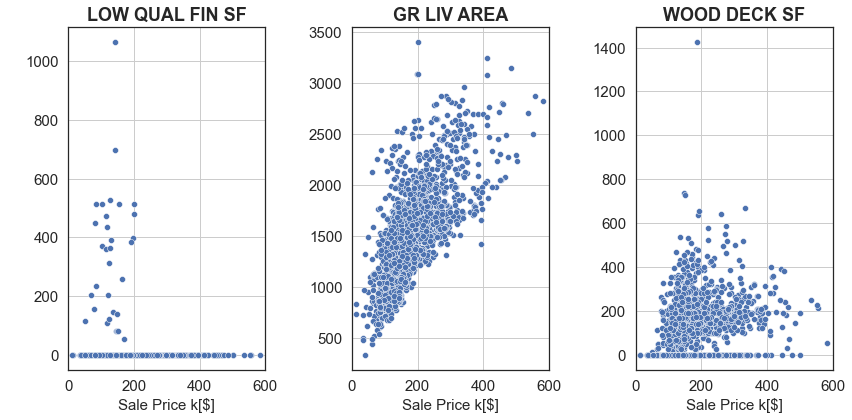

In [478]:
plot_scatter_values(dataset , features_continous_numeric[9:12])

In [479]:
# drop outliars
dataset = dataset[dataset['Gr Liv Area'] < 3000]
dataset = dataset[dataset['Wood Deck SF'] < 800]

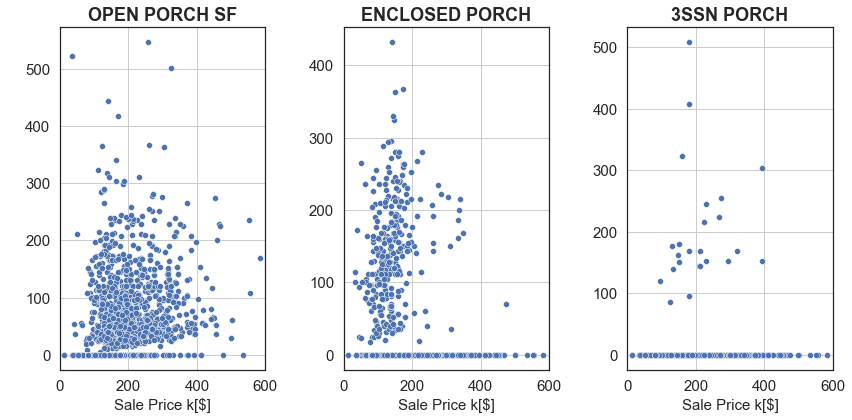

In [480]:
plot_scatter_values(dataset , features_continous_numeric[12:15])

In [481]:
# drop outliars
dataset = dataset[dataset['Open Porch SF'] < 300]
dataset = dataset[dataset['Enclosed Porch'] < 300]

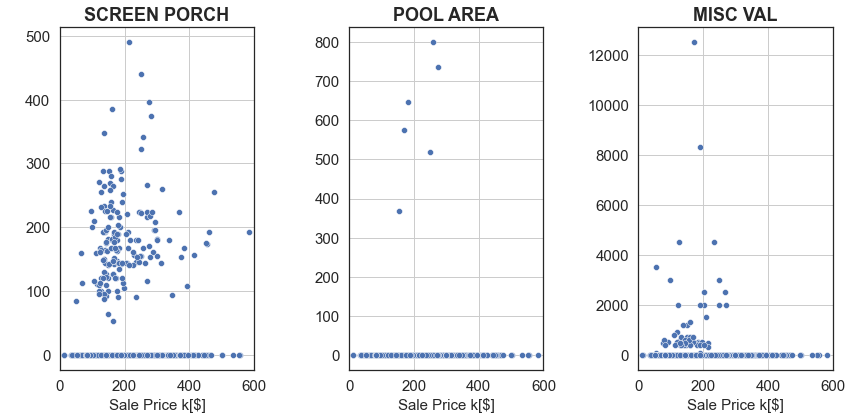

In [482]:
plot_scatter_values(dataset , features_continous_numeric[15:18])

In [483]:
# drop outliars
dataset = dataset[dataset['Misc Val'] < 8000]

In [484]:
# print_dataset(dataset[features_continous_numeric])

In [485]:
# print_dataset_type( dataset[features_continous_numeric] )

In [486]:
check_nulls( dataset[features_continous_numeric] )

,column name,null count,null count %,values example


In [487]:
# drop '3Ssn Porch'
dataset.drop(columns=['Pool Area'], inplace= True)

In [488]:
# drop '3Ssn Porch' feature
dataset.drop(columns=['3Ssn Porch'], inplace= True)

In [489]:
# drop 'Low Qual Fin SF' feature
dataset.drop(columns=['Low Qual Fin SF'], inplace= True)

In [490]:
#save
dataset.to_csv('../datasets/train_df_cleaned.csv')

# Features: features_string_to_dum ===========================================================

In [491]:
features_category_string_to_dum = [   
    'MS Zoning',
    'Street',
    'Lot Shape',
    'Land Contour',
    'Utilities',
    'Neighborhood',
    'Bldg Type',
    'House Style',
    'Roof Style',
    'Roof Matl',
    'Exterior 1st' , 'Exterior 2nd',
    'Condition 1', 'Condition 2',
    'Mas Vnr Type', 
    'Heating',
    'Central Air',
    'Electrical',   
    'Functional',   
    'Garage Type', 
    'Sale Type',
    'Lot Config',
#     'Sale Condition',
    
    
]

In [492]:
print_dataset(dataset[features_category_string_to_dum])

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Neighborhood,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Condition 1,Condition 2,Mas Vnr Type,Heating,Central Air,Electrical,Functional,Garage Type,Sale Type,Lot Config
0,RL,Pave,IR1,Lvl,AllPub,Sawyer,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,RRAe,Norm,BrkFace,GasA,Y,SBrkr,Typ,Attchd,WD,CulDSac
1,RL,Pave,IR1,Lvl,AllPub,SawyerW,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Norm,Norm,BrkFace,GasA,Y,SBrkr,Typ,Attchd,WD,CulDSac
2,RL,Pave,Reg,Lvl,AllPub,NAmes,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Norm,Norm,None,GasA,Y,SBrkr,Typ,Detchd,WD,Inside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,RL,Pave,Reg,Bnk,AllPub,Crawfor,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,Norm,Norm,None,GasA,Y,SBrkr,Typ,Detchd,WD,Inside
2049,RL,Pave,Reg,Lvl,AllPub,NAmes,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Norm,Norm,None,GasA,Y,SBrkr,Typ,Attchd,WD,Corner
2050,RL,Pave,Reg,Lvl,AllPub,Gilbert,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Norm,Norm,None,GasA,Y,SBrkr,Typ,Attchd,WD,Inside


In [493]:
dataset[features_category_string_to_dum].isnull().sum()

MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Neighborhood      0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Condition 1       0
Condition 2       0
Mas Vnr Type     21
Heating           0
Central Air       0
Electrical        0
Functional        0
Garage Type     109
Sale Type         0
Lot Config        0
dtype: int64

In [494]:
dataset[['Mas Vnr Type','Garage Type']] = dataset[['Mas Vnr Type','Garage Type']].fillna(value='NA') #NA : Not Availible

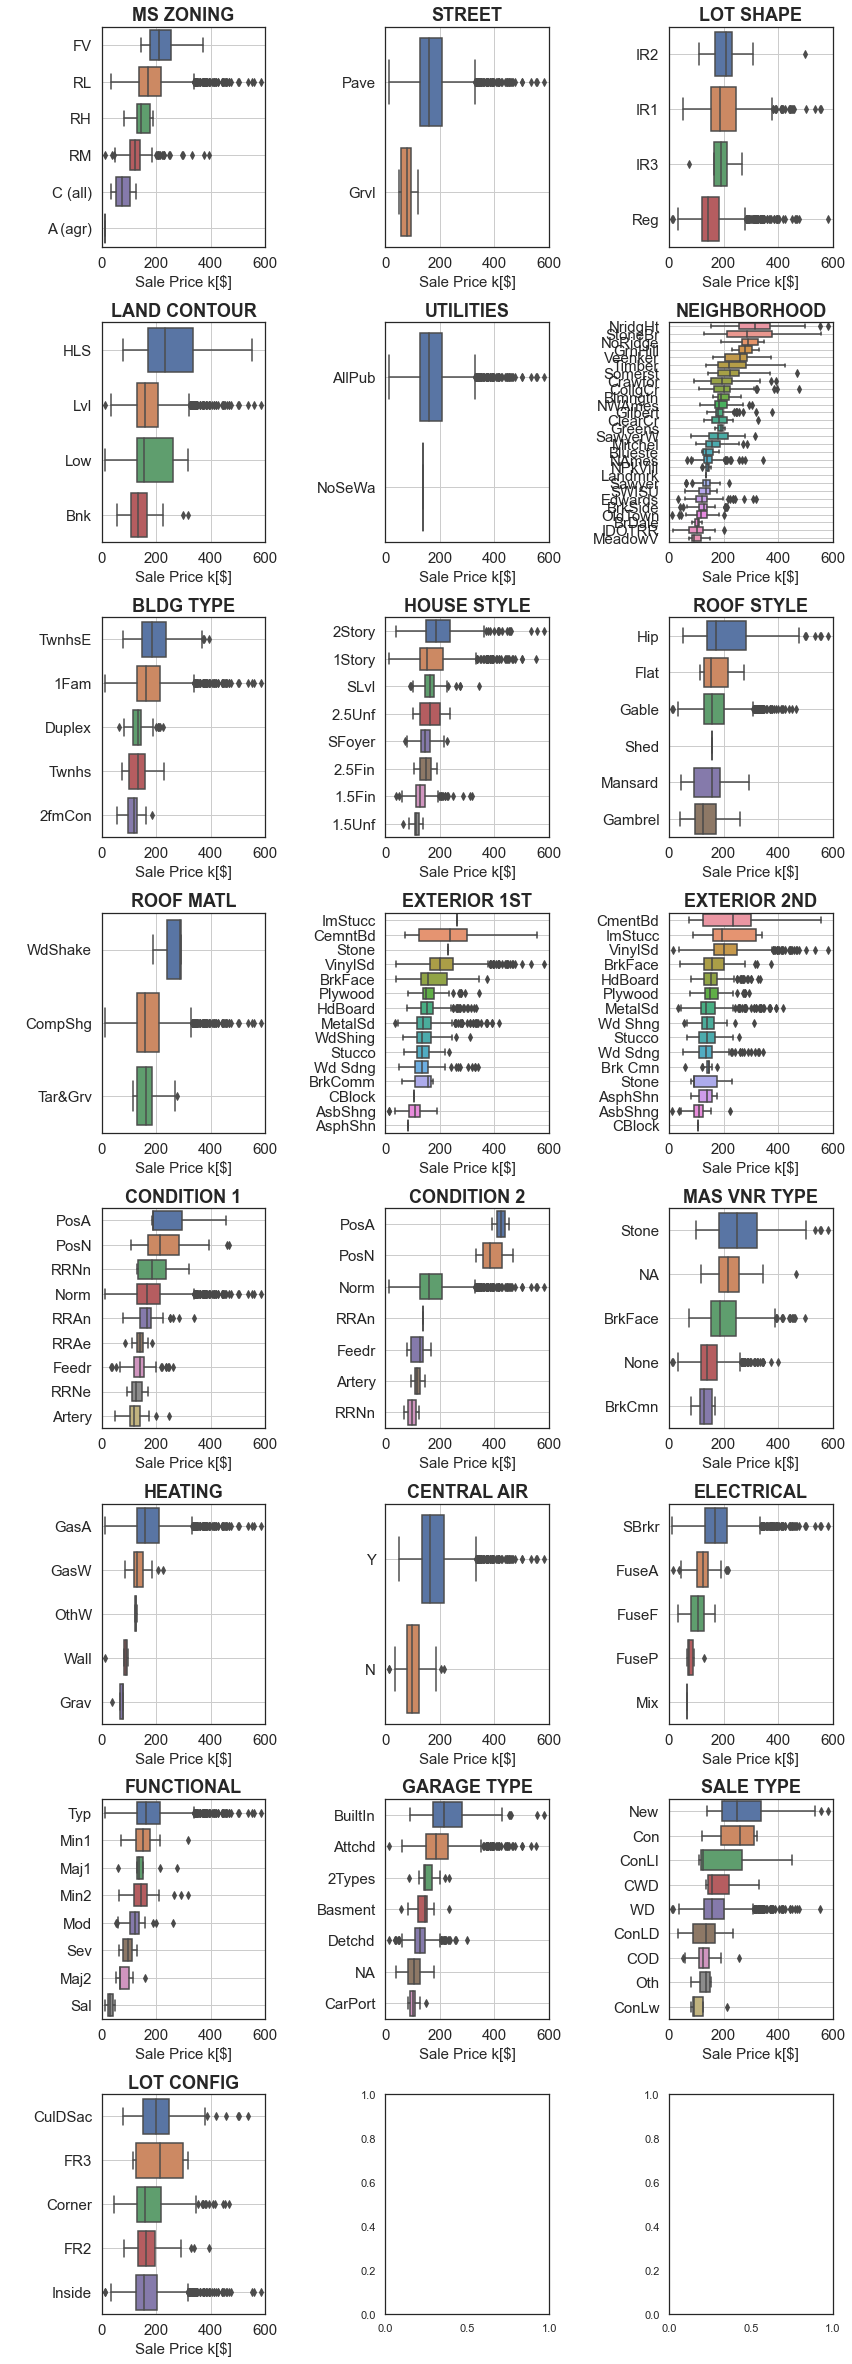

In [495]:
plot_boxplot_category(dataset,features_category_string_to_dum)

In [496]:
dataset_dum = pd.get_dummies(data = dataset, 
                             columns = features_category_string_to_dum,  
                             drop_first = True)

In [497]:
# drop 'Lot Config'
dataset['Lot Config'].drop(columns=['Lot Config'], inplace= True)

In [498]:
print_dataset(dataset_dum)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShake,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside
0,109,533352170,60,69.0552,13517,NaN,Gtl,6,8,1976,2005,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,Ex,725,754,1479,0.0,0.0,2,1,3,1,Gd,6,0,NaN,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,NaN,NaN,NaN,0,3,2010,130500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,544,531379050,60,43.0000,11492,NaN,Gtl,7,5,1996,1997,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,Ex,913,1209,2122,1.0,0.0,2,1,4,1,Gd,8,1,TA,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,NaN,NaN,NaN,0,4,2009,220000,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

# Features: features_categorical_numeric_values ===========================================================

In [499]:
features_categorical_numeric_values = [
    'Overall Qual', 'Overall Cond', # 10, 9, 8, ..., 1
]

In [500]:
check_nulls(dataset_dum[features_categorical_numeric_values])

,column name,null count,null count %,values example


In [501]:
# print_dataset_type(dataset_dum[features_categorical_numeric_values])

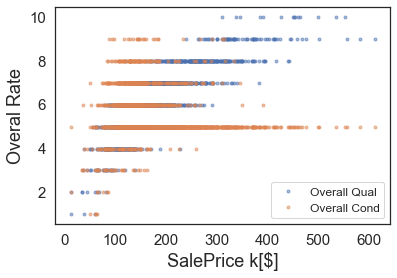

In [502]:
plt.plot(dataset_dum['SalePrice']/1000, dataset_dum[features_categorical_numeric_values],'.',alpha=0.5)
plt.xlabel('SalePrice k[$]',fontsize=18)
plt.ylabel('Overal Rate',fontsize=18)
plt.legend(('Overall Qual', 'Overall Cond'),fontsize=12);

In [503]:
# dataset['Overall Qual Cond combined'] = 
#FIND ME!! COMBINE TWO ARRAYS!!!!

In [504]:
dataset_dum2 = pd.get_dummies(data = dataset_dum , 
                             columns = features_categorical_numeric_values,  
                             drop_first = True)

In [505]:
print_dataset(dataset_dum2)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Land Slope,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShake,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9
0,109,533352170,60,69.0552,13517,NaN,Gtl,1976,2005,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,Ex,725,754,1479,0.0,0.0,2,1,3,1,Gd,6,0,NaN,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,NaN,NaN,NaN,0,3,2010,130500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,544,531379050,60,43.0000,11492,NaN,Gtl,1996,1997,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Un

In [506]:
dataset_dum2.to_csv('../datasets/train_df_cleaned.csv')

# Features: Categorical with quality in numeric ===========================================================

In [507]:
features_category_numeric_to_dum = [
    'MS SubClass',
    'Mo Sold',
    
]

In [508]:
check_nulls( dataset_dum2[features_category_numeric_to_dum] )

,column name,null count,null count %,values example


Text(0, 0.5, 'Mo Sold')

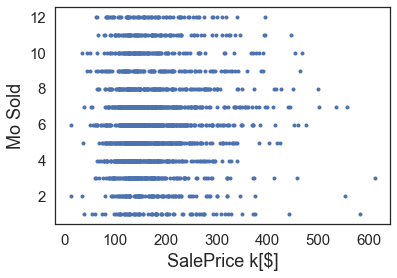

In [509]:
plt.plot(dataset_dum['SalePrice']/1000, dataset_dum[features_category_numeric_to_dum[1]],'.',alpha=1)
plt.xlabel('SalePrice k[$]',fontsize=18)
plt.ylabel('Mo Sold',fontsize=18)
# plt.legend(('Overall Qual', 'Overall Cond'),fontsize=12);

In [510]:
dataset_dum3 = pd.get_dummies(data = dataset_dum2 , 
                             columns = features_category_numeric_to_dum,  
                             drop_first = True)

In [511]:
print_dataset(dataset_dum3)

,Id,PID,Lot Frontage,Lot Area,Alley,Land Slope,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool QC,Fence,Misc Feature,Misc Val,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShake,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,109,533352170,69.0552,13517,NaN,Gtl,1976,2005,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,Ex,725,754,1479,0.0,0.0,2,1,3,1,Gd,6,0,NaN,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,NaN,NaN,NaN,0,2010,130500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [512]:
dataset_dum3.to_csv('../datasets/train_df_cleaned.csv')

# Features: quality features in a range of Excellent to poor ===========================================================

In [513]:
string_quality_to_quantity_features =[ #rate
    'Land Slope',
    'Exter Qual' , 'Exter Cond',   # Ex, Gd, TA, Fa, Po
    'Bsmt Qual', 'Bsmt Cond',      # Ex, Gd, TA, Fa, Po, NA
    'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin Type 2', # GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA
    'Heating QC',  # Ex, Gd, TA, Fa, Po
    'Kitchen Qual', # Ex, Gd, TA, Fa, Po
    'Fireplace Qu',     # Ex, Gd, TA, Fa, Po, NA
    'Garage Finish',   # Fin, 
    'Garage Qual',     # Ex, Gd, TA, Fa, Po, NA
    'Paved Drive',     # Y, P, N
    'Pool QC', # Ex, Gd, TA, Fa, NA
    'Fence', # GdPrv,...
    'Garage Cond',
]

In [514]:
check_nulls(dataset_dum3[string_quality_to_quantity_features])

,column name,null count,null count %,values example
0,Bsmt Qual,48,2.5,"[TA, Gd, TA, Gd, Fa, TA, Gd, TA, Gd, TA]"
1,Bsmt Cond,48,2.5,"[TA, TA, TA, TA, Gd, TA, TA, TA, TA, TA]"
2,Bsmt Exposure,51,2.6,"[No, No, No, No, No, No, Gd, No, Av, No]"
3,BsmtFin Type 1,48,2.5,"[GLQ, GLQ, GLQ, Unf, Unf, ALQ, GLQ, Rec, Rec, ..."
4,BsmtFin Type 2,48,2.5,"[Unf, Unf, Unf, Unf, Unf, Rec, Unf, Unf, Unf, ..."
5,Fireplace Qu,976,50.5,"[nan, TA, nan, nan, nan, Gd, nan, nan, TA, nan]"
6,Garage Finish,110,5.7,"[RFn, RFn, Unf, Fin, Unf, Fin, Fin, RFn, Unf, ..."
7,Garage Qual,110,5.7,"[TA, TA, TA, TA, TA, TA, TA, TA, TA, TA]"
8,Pool QC,1926,99.7,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
9,Fence,1553,80.4,"[nan, nan, nan, nan, nan, nan, nan, MnPrv, nan..."


In [515]:
dataset_dum3[string_quality_to_quantity_features] = dataset_dum3[string_quality_to_quantity_features].fillna(value='NA') #NA : Not Availible

In [516]:
check_nulls(dataset_dum3[string_quality_to_quantity_features])

,column name,null count,null count %,values example


In [517]:
#check categories
# dataset_dum[string_quality_to_quantity_features[16]].value_counts()

In [518]:
def replace_quantity_to_quality(df , x):
    [df.replace(x[i][0],x[i][1], inplace = True) for i in range(len(x)) ]
    return df

In [519]:
list_cat=['Fence']
x = [ ['NA',0] , ['MnWw',1], ['GdWo',2], ['MnPrv', 3], ['GdPrv', 4]]
dataset_dum3[list_cat] = replace_quantity_to_quality(dataset_dum3[list_cat], x )

In [520]:
list_cat=['Pool QC']
x = [ ['NA',0] , ['Fa',1], ['TA',2], ['Gd', 3]]
dataset_dum3[list_cat] = replace_quantity_to_quality(dataset_dum3[list_cat], x )

In [521]:
list_cat=['Land Slope']
x = [ ['Gtl',1] , ['Mod',2], ['Sev',3]]
dataset_dum3[list_cat] = replace_quantity_to_quality(dataset_dum3[list_cat], x )

In [522]:
list_cat=['Exter Qual', 'Kitchen Qual','Pool QC']
x = [ ['NA',0] ,['Fa',1] , ['TA',2], ['Gd',3],  ['Ex',4]]
dataset_dum3[list_cat] = replace_quantity_to_quality(dataset_dum3[list_cat], x )

In [523]:
list_cat=['Exter Cond','Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Fireplace Qu', 'Garage Qual', 'Garage Cond']
x = [ ['NA',0] , ['Po',0] ,['Fa',1] , ['TA',2], ['Gd',3], ['Ex',4]]
dataset_dum3[list_cat] = replace_quantity_to_quality(dataset_dum3[list_cat], x )

In [524]:
list_cat=['Bsmt Exposure']
x = [ ['NA',0] , ['No',0] ,['Mn',1] , ['Av',2], ['Gd',3]]
dataset_dum3[list_cat] = replace_quantity_to_quality(dataset_dum3[list_cat], x )

In [525]:
# find me combine 'BsmtFin Type 1','BsmtFin Type 2'

list_cat=['BsmtFin Type 1','BsmtFin Type 2']
x = [ ['NA',0] , ['Unf',1] , ['LwQ',2], ['Rec',3], ['BLQ', 4], ['ALQ', 5], ['GLQ', 6]]
dataset_dum3[list_cat] = replace_quantity_to_quality(dataset_dum3[list_cat], x )

In [526]:
# find me combine 'BsmtFin Type 1','BsmtFin Type 2'

list_cat=['Garage Finish']
x = [ ['NA',0] , ['Unf',1] , ['RFn',2], ['Fin',3] ]
dataset_dum3[list_cat] = replace_quantity_to_quality(dataset_dum3[list_cat], x )

In [527]:
# find me combine 'BsmtFin Type 1','BsmtFin Type 2'

list_cat=['Paved Drive']
x = [ ['NA',0] , ['N',1] , ['P',2], ['Y',3] ]
dataset_dum3[list_cat] = replace_quantity_to_quality(dataset_dum3[list_cat], x )

In [528]:
check_nulls(dataset_dum3[string_quality_to_quantity_features])

,column name,null count,null count %,values example


In [529]:
print_dataset ( dataset_dum3[string_quality_to_quantity_features] )

,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Finish,Garage Qual,Paved Drive,Pool QC,Fence,Garage Cond
0,1,3,2,2,2,0,6,1,4,3,0,2,2,3,0,0,2
1,1,3,2,3,2,0,6,1,4,3,2,2,2,3,0,0,2
2,1,2,3,2,2,0,6,1,2,3,0,1,2,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,1,2,2,2,2,0,1,1,3,2,2,1,1,3,0,0,1
2049,1,2,2,2,2,0,3,2,2,2,3,1,2,3,0,0,2
2050,1,2,2,2,2,0,1,1,3,3,2,3,2,3,0,0,2


In [530]:
check_nulls(dataset_dum3[string_quality_to_quantity_features])

,column name,null count,null count %,values example


In [531]:
print_dataset_type(dataset_dum3[string_quality_to_quantity_features])

Land Slope        int64
Exter Qual        int64
Exter Cond        int64
Bsmt Qual         int64
Bsmt Cond         int64
Bsmt Exposure     int64
BsmtFin Type 1    int64
BsmtFin Type 2    int64
Heating QC        int64
Kitchen Qual      int64
Fireplace Qu      int64
Garage Finish     int64
Garage Qual       int64
Paved Drive       int64
Pool QC           int64
Fence             int64
Garage Cond       int64
dtype: object


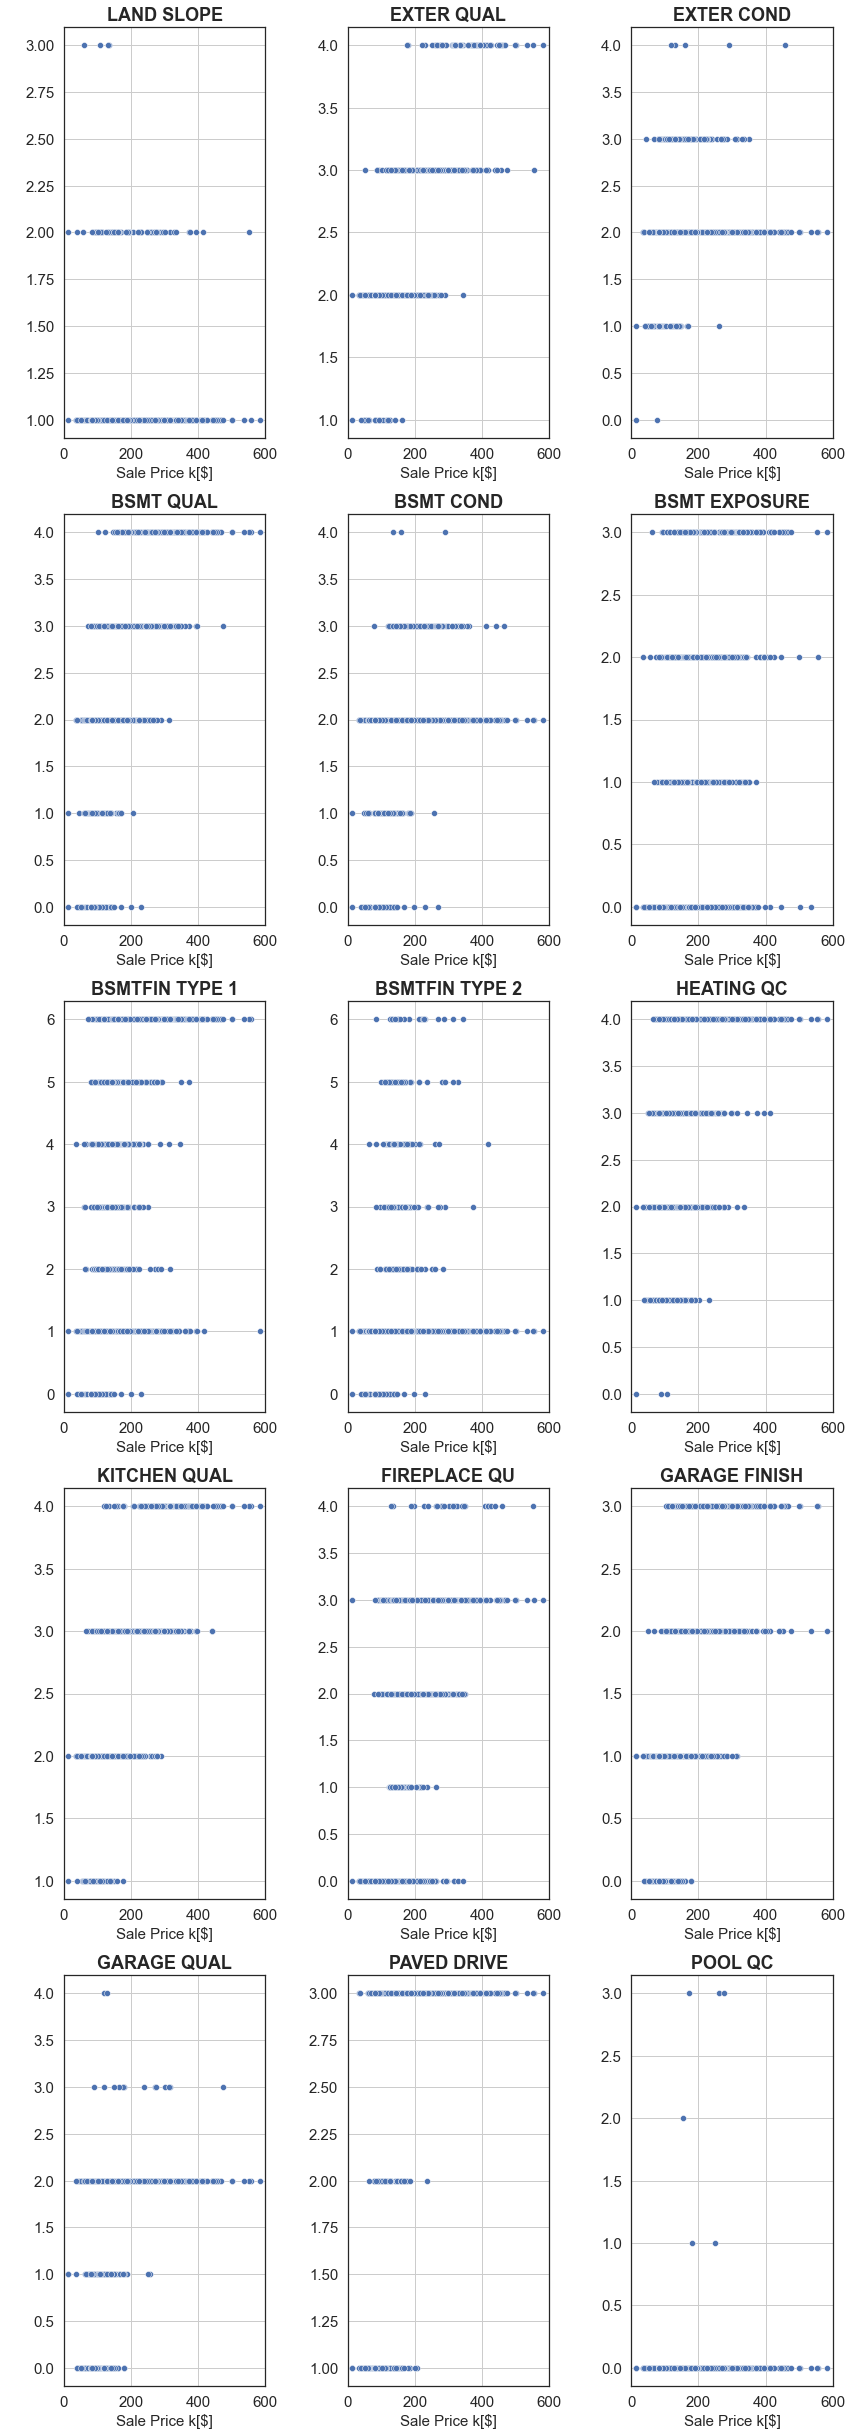

In [532]:
plot_scatter_values(dataset_dum3, string_quality_to_quantity_features)

In [533]:
dataset_dum3.to_csv('../datasets/train_df_cleaned.csv')

# Features: Continous / numeric ===========================================================

In [534]:
features_continous_numeric = [
    'Lot Frontage',
    'Lot Area',
    'Mas Vnr Area',
    'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
    '1st Flr SF',
    '2nd Flr SF',
#     'Low Qual Fin SF',
    'Gr Liv Area', 
    'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
#     '3Ssn Porch', 
    'Screen Porch',
#     'Pool Area', 
    'Misc Val',
    
]


In [535]:
check_nulls(dataset_dum3[features_continous_numeric])

,column name,null count,null count %,values example


In [536]:
# replace_null_with_mean(dataset_dum , ['Lot Frontage','Mas Vnr Area'])

In [537]:
# print_dataset_type (  dataset_dum[['Lot Frontage','Mas Vnr Area'] ]  )

In [538]:
# drop nulls < 30 
# dataset_dum.dropna(subset=null[null['null count'] < 30]['column name'], inplace = True)

In [539]:
# check_nulls(dataset_dum[features_continous_numeric])

In [540]:
# dataset_dum['Lot Frontage'].isnull().sum()

In [541]:
# plot features_continous_numeric

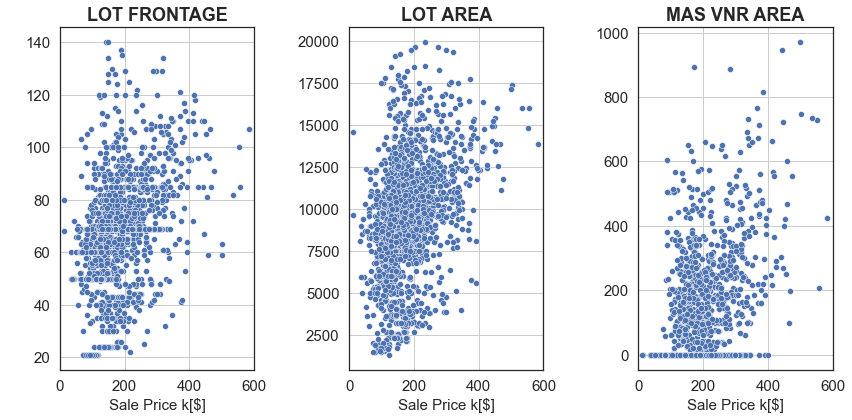

In [542]:
plot_scatter_values(dataset_dum3 , features_continous_numeric[0:3])

In [543]:
# drop outliars
dataset_dum3 = dataset_dum3[dataset_dum3['Lot Frontage'] < 150]
dataset_dum3 = dataset_dum3[dataset_dum3['Lot Area'] < 20000]
dataset_dum3 = dataset_dum3[dataset_dum3['Mas Vnr Area'] < 800]

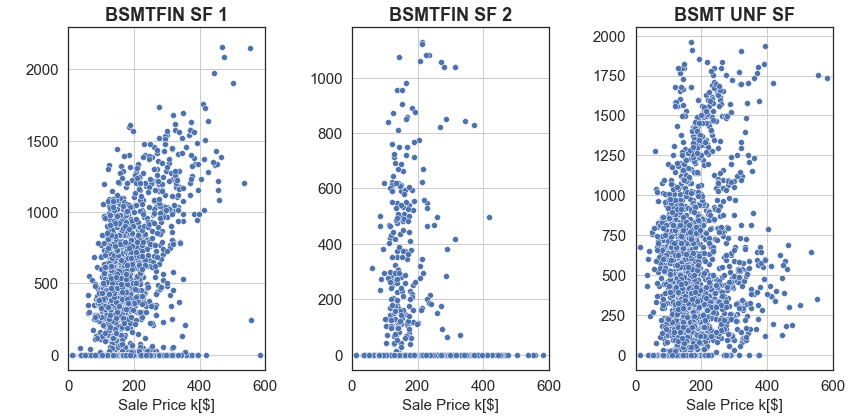

In [544]:
plot_scatter_values(dataset_dum3 , features_continous_numeric[3:6])

In [545]:
# drop outliars
dataset_dum3 = dataset_dum3[dataset_dum3['BsmtFin SF 2'] < 1200]
dataset_dum3 = dataset_dum3[dataset_dum3['Bsmt Unf SF'] < 1700]

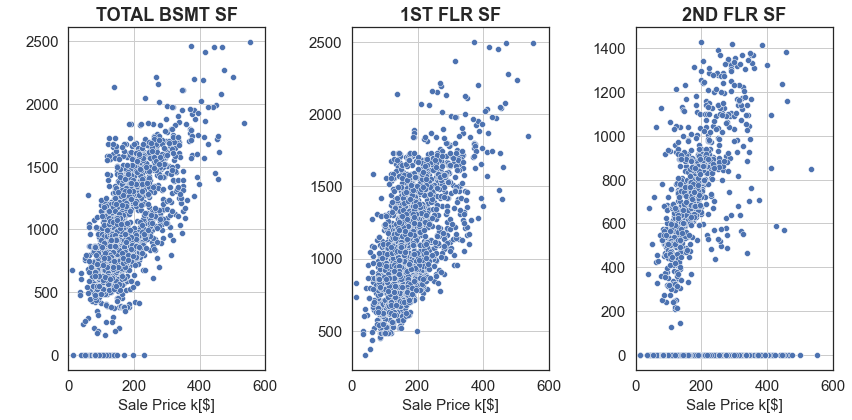

In [546]:
plot_scatter_values(dataset_dum3 , features_continous_numeric[6:9])

In [547]:
# drop outliars
dataset_dum3 = dataset_dum3[dataset_dum3['Total Bsmt SF'] < 2500]
dataset_dum3 = dataset_dum3[dataset_dum3['1st Flr SF'] < 2100]
dataset_dum3 = dataset_dum3[dataset_dum3['2nd Flr SF'] < 1500]

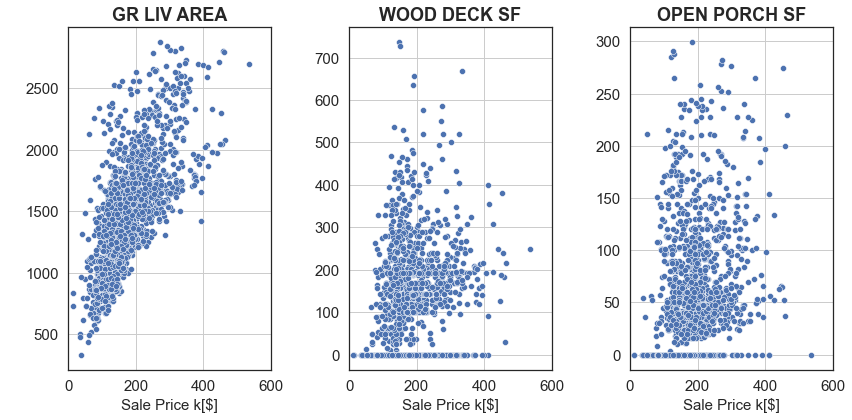

In [548]:
plot_scatter_values(dataset_dum3 , features_continous_numeric[9:12])

In [549]:
# drop outliars
dataset_dum3 = dataset_dum3[dataset_dum3['Gr Liv Area'] < 3000]
dataset_dum3 = dataset_dum3[dataset_dum3['Wood Deck SF'] < 600]

In [550]:
 # drop 'Low Qual Fin SF' feature
# dataset_dum.drop(columns=['Low Qual Fin SF'], inplace= True)

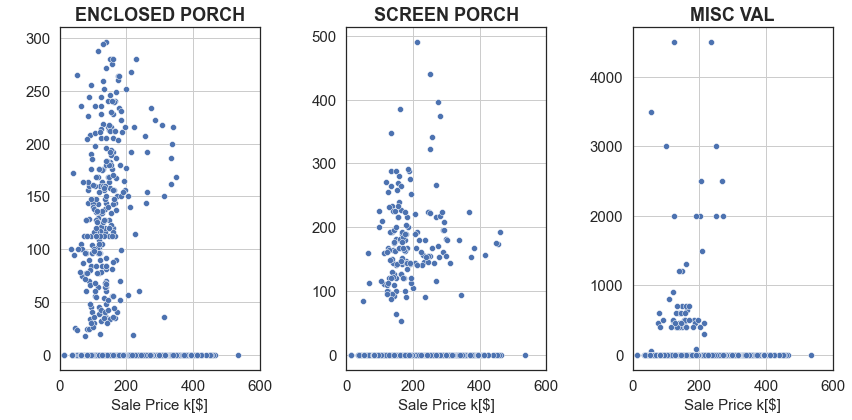

In [551]:
plot_scatter_values(dataset_dum3 , features_continous_numeric[12:15])

In [552]:
# drop '3Ssn Porch' feature
# dataset_dum.drop(columns=['3Ssn Porch'], inplace= True)

In [553]:
# drop outliars
dataset_dum3 = dataset_dum3[dataset_dum3['Open Porch SF'] < 400]
dataset_dum3 = dataset_dum3[dataset_dum3['Enclosed Porch'] < 400]

In [554]:
# plot_scatter_values(dataset_dum , features_continous_numeric[15:18])

In [555]:
# drop '3Ssn Porch'
# dataset_dum.drop(columns=['Pool Area'], inplace= True)

In [556]:
print_dataset(dataset_dum3)

,Id,PID,Lot Frontage,Lot Area,Alley,Land Slope,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool QC,Fence,Misc Feature,Misc Val,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShake,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,109,533352170,69.0552,13517,NaN,1,1976,2005,289.0,3,2,CBlock,2,2,0,6,533.0,1,0.0,192.0,725.0,4,725,754,1479,0.0,0.0,2,1,3,1,3,6,0,0,1976.0,2,2.0,475.0,2,2,3,0,44,0,0,0,0,NaN,0,2010,130500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0

In [557]:
# drop outliars
dataset_dum3 = dataset_dum3[dataset_dum3['Misc Val'] < 8000]

In [558]:
# remove the dropped features from features_continous_numeric
# [features_continous_numeric.remove(elem) for elem in  ['Low Qual Fin SF', 'Pool Area', '3Ssn Porch'] ]

In [559]:
print_dataset(dataset_dum3[features_continous_numeric])

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Misc Val
0,69.0552,13517,289.0,533.0,0.0,192.0,725.0,725,754,1479,0,44,0,0,0
1,43.0000,11492,132.0,637.0,0.0,276.0,913.0,913,1209,2122,0,74,0,0,0
2,68.0000,7922,0.0,731.0,0.0,326.0,1057.0,1057,0,1057,0,52,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,57.0000,7558,0.0,0.0,0.0,896.0,896.0,1172,741,1913,0,0,0,0,0
2049,80.0000,10400,0.0,155.0,750.0,295.0,1200.0,1200,0,1200,0,189,140,0,0
2050,60.0000,7500,0.0,0.0,0.0,994.0,994.0,1028,776,1804,140,60,0,0,0


In [560]:
check_nulls(dataset_dum3[features_continous_numeric])

,column name,null count,null count %,values example


In [561]:
print_dataset_type( dataset_dum3[features_continous_numeric] )

Lot Frontage      float64
Lot Area            int64
Mas Vnr Area      float64
BsmtFin SF 1      float64
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
1st Flr SF          int64
2nd Flr SF          int64
Gr Liv Area         int64
Wood Deck SF        int64
Open Porch SF       int64
Enclosed Porch      int64
Screen Porch        int64
Misc Val            int64
dtype: object


In [562]:
#save
dataset_dum3.to_csv('../datasets/train_df_cleaned.csv')

# Features: will be deleted ===========================================================

In [563]:
useless_features_toDrop = [
    'Id',
    'PID',
    'Alley',
#     'Alley'
]

In [564]:
print_dataset(dataset_dum3)

,Id,PID,Lot Frontage,Lot Area,Alley,Land Slope,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool QC,Fence,Misc Feature,Misc Val,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShake,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,109,533352170,69.0552,13517,NaN,1,1976,2005,289.0,3,2,CBlock,2,2,0,6,533.0,1,0.0,192.0,725.0,4,725,754,1479,0.0,0.0,2,1,3,1,3,6,0,0,1976.0,2,2.0,475.0,2,2,3,0,44,0,0,0,0,NaN,0,2010,130500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0

In [565]:
# drop 'PID' feature
dataset_dum3.drop(columns=['PID'], inplace= True)

In [566]:
# drop 'Alley' feature
dataset_dum3.drop(columns=['Alley'], inplace= True)

In [567]:
print_dataset(dataset_dum3)

,Id,Lot Frontage,Lot Area,Land Slope,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool QC,Fence,Misc Feature,Misc Val,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShake,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,109,69.0552,13517,1,1976,2005,289.0,3,2,CBlock,2,2,0,6,533.0,1,0.0,192.0,725.0,4,725,754,1479,0.0,0.0,2,1,3,1,3,6,0,0,1976.0,2,2.0,475.0,2,2,3,0,44,0,0,0,0,NaN,0,2010,130500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

# Features: for possible engeeniering ===========================================================

In [568]:
features_to_be_decide = [

    'Year Built', 'Yr Sold',
    'Year Remod/Add',
    'Foundation',
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
    'Bedroom AbvGr',
    'Kitchen AbvGr',
    'TotRms AbvGrd',
    'Fireplaces',
    'Garage Yr Blt',
    'Garage Cars', 'Garage Area',
]

In [569]:
null = check_nulls(dataset_dum3[features_to_be_decide])
null

,column name,null count,null count %,values example
0,Garage Yr Blt,107,5.7,"[1976.0, 1997.0, 1953.0, 2007.0, 1957.0, 1966...."
1,Garage Cars,1,0.1,"[2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ..."
2,Garage Area,1,0.1,"[475.0, 559.0, 246.0, 400.0, 484.0, 578.0, 525..."


In [570]:
dataset_dum3.dropna(subset=null['column name'], inplace=True)

In [571]:
check_nulls(dataset_dum3[features_to_be_decide])

,column name,null count,null count %,values example


In [572]:
print_dataset_type(dataset_dum3[features_to_be_decide])

Year Built          int64
Yr Sold             int64
Year Remod/Add      int64
Foundation         object
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
TotRms AbvGrd       int64
Fireplaces          int64
Garage Yr Blt     float64
Garage Cars       float64
Garage Area       float64
dtype: object


In [573]:
# drop 'Misc Feature' feature
dataset_dum3.drop(columns=['Misc Feature'], inplace= True)

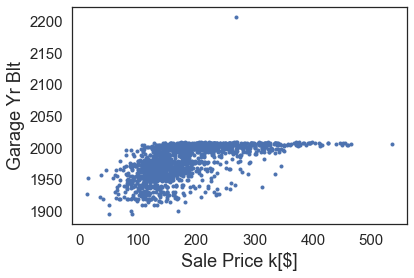

In [574]:
plt.plot(dataset_dum3['SalePrice']/1000,dataset_dum3['Garage Yr Blt'],'.')
plt.ylabel('Garage Yr Blt', fontsize=18)
plt.xlabel('Sale Price k[$]', fontsize=18);

In [575]:
ind = dataset_dum3 [dataset_dum3['Garage Yr Blt'] > 2010].index
dataset_dum3.drop(index=ind , inplace=True)

In [576]:
ind = dataset_dum3[dataset_dum3['SalePrice']<30000]['Garage Yr Blt'].index 
dataset_dum3.drop(index = ind,inplace=True)

In [577]:
# to fix the Nulls with mean
replace_null_with_mean(dataset_dum3 , ['Garage Yr Blt'])

In [578]:
dataset_dum3['Garage Age'] = dataset_dum3['Yr Sold'] - dataset_dum3['Garage Yr Blt']

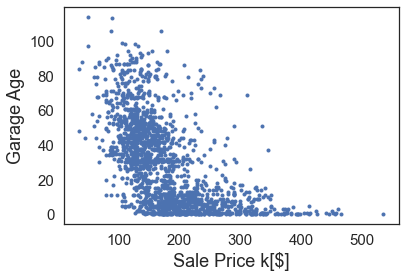

In [579]:
plt.plot(dataset_dum3['SalePrice']/1000,dataset_dum3['Garage Age'],'.')
plt.ylabel('Garage Age', fontsize=18)
plt.xlabel('Sale Price k[$]', fontsize=18);

In [580]:
ind = dataset_dum3[dataset_dum3['SalePrice']>500000]['Garage Age'].index 
dataset_dum3.drop(index = ind,inplace=True)

In [581]:
# house age

In [582]:
dataset_dum3[['Yr Sold','Year Built']].describe().T

,count,mean,std,min,25%,50%,75%,max
Yr Sold,1764.0,2007.788549,1.316618,2006.0,2007.0,2008.0,2009.0,2010.0
Year Built,1764.0,1973.115079,29.131498,1879.0,1955.0,1976.0,2002.0,2010.0


In [583]:
dataset_dum3['Age'] =  dataset_dum3['Yr Sold'] - dataset_dum3['Year Built']

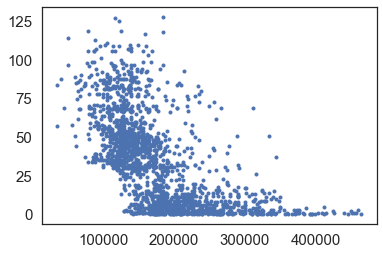

In [584]:
plt.plot(dataset_dum3['SalePrice'],dataset_dum3['Age'],'.');

In [585]:
# remodel age

In [586]:
dataset_dum3['remodel age'] = dataset_dum3['Yr Sold'] - dataset_dum3['Year Remod/Add']

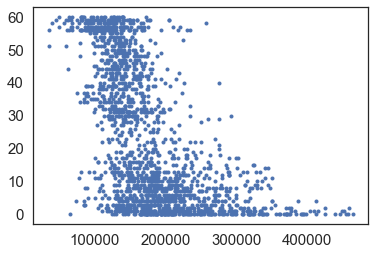

In [587]:
plt.plot(dataset_dum3['SalePrice'],dataset_dum3['remodel age'],'.');

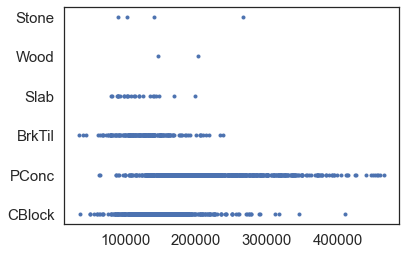

In [588]:
plt.plot (dataset_dum3['SalePrice'], dataset_dum3['Foundation'], '.');

In [589]:
# drop rows with ['Foundation']=='Wood'
ind = dataset_dum3[dataset_dum3['Foundation']=='Wood'].index 
dataset_dum3.drop(index = ind,inplace=True)

In [590]:
list_cat=['Foundation']
x = [ ['Stone',0] , ['Slab',1], ['BrkTil',2], ['CBlock', 3], ['PConc', 4]]
dataset_dum3[list_cat] = replace_quantity_to_quality(dataset_dum3[list_cat], x )

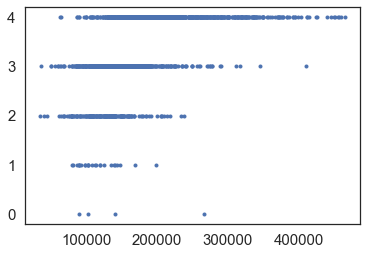

In [591]:
plt.plot (dataset_dum3['SalePrice'], dataset_dum3['Foundation'], '.');

In [592]:
dataset_dum3['Foundation'].value_counts()

4    813
3    734
2    186
1     25
0      4
Name: Foundation, dtype: int64

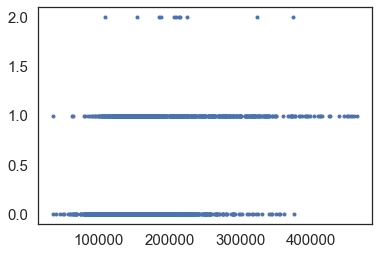

In [593]:
plt.plot(dataset_dum3['SalePrice'],dataset_dum3[['Bsmt Full Bath']],'.');

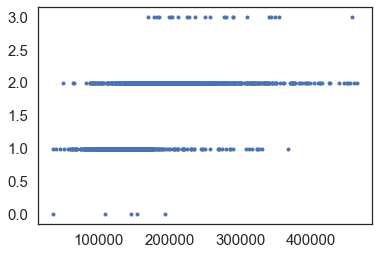

In [594]:
plt.plot(dataset_dum3['SalePrice'], dataset_dum3[[ 'Full Bath']],'.');

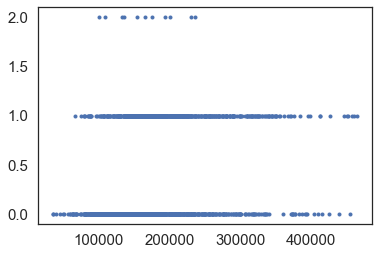

In [595]:
plt.plot(dataset_dum3['SalePrice'], dataset_dum3['Half Bath'],'.');

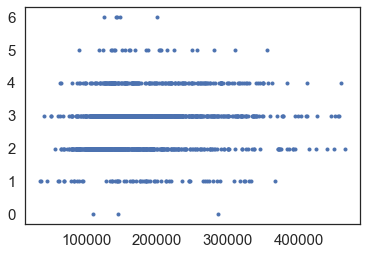

In [596]:
plt.plot(dataset_dum3['SalePrice'], dataset_dum3[['Bedroom AbvGr']],'.');

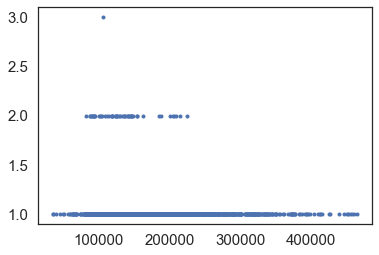

In [597]:
plt.plot(dataset_dum3['SalePrice'], dataset_dum3[['Kitchen AbvGr']],'.');

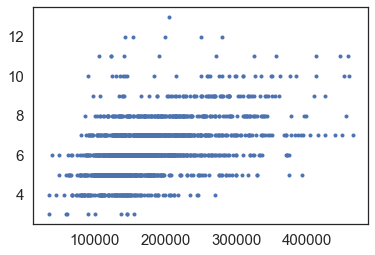

In [598]:
plt.plot(dataset_dum3['SalePrice'], dataset_dum3[['TotRms AbvGrd']],'.')

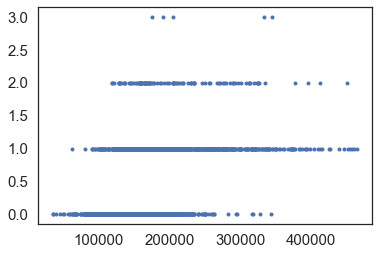

In [599]:
plt.plot(dataset_dum3['SalePrice'], dataset_dum3[['Fireplaces']],'.');

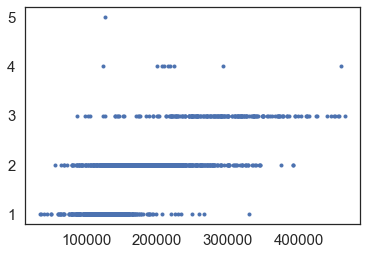

In [600]:
plt.plot(dataset_dum3['SalePrice'], dataset_dum3[['Garage Cars']],'.');

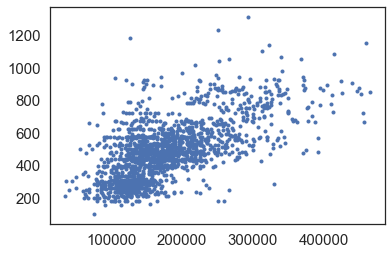

In [601]:
plt.plot(dataset_dum3['SalePrice'], dataset_dum3[['Garage Area',]],'.');

In [602]:
print_dataset(dataset_dum3)

,Id,Lot Frontage,Lot Area,Land Slope,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool QC,Fence,Misc Val,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShake,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Garage Age,Age,remodel age
0,109,69.0552,13517,1,1976,2005,289.0,3,2,3,2,2,0,6,533.0,1,0.0,192.0,725.0,4,725,754,1479,0.0,0.0,2,1,3,1,3,6,0,0,1976.0,2,2.0,475.0,2,2,3,0,44,0,0,0,0,0,2010,130500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [603]:
dataset_dum3.isnull().sum().sort_values(ascending=False)

Id                      0
Electrical_Mix          0
Condition 2_RRNn        0
Mas Vnr Type_BrkFace    0
Mas Vnr Type_NA         0
                       ..
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
remodel age             0
Length: 233, dtype: int64

In [604]:
replace_null_with_mean(dataset_dum3 , ['Mas Vnr Area'])

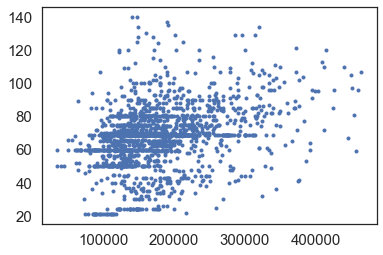

In [605]:
plt.plot(dataset_dum3['SalePrice'], dataset_dum3[['Lot Frontage']],'.');

In [606]:
ind = dataset_dum3[dataset_dum3['Lot Frontage'] > 150].index
dataset_dum3.drop(index = ind, inplace=True)

# Features: Final Dtype check ===========================================================

In [607]:
print_dataset_type(dataset_dum3)

Id                        int64
Lot Frontage            float64
Lot Area                  int64
Land Slope                int64
Year Built                int64
Year Remod/Add            int64
Mas Vnr Area            float64
Exter Qual                int64
Exter Cond                int64
Foundation                int64
Bsmt Qual                 int64
Bsmt Cond                 int64
Bsmt Exposure             int64
BsmtFin Type 1            int64
BsmtFin SF 1            float64
BsmtFin Type 2            int64
BsmtFin SF 2            float64
Bsmt Unf SF             float64
Total Bsmt SF           float64
Heating QC                int64
1st Flr SF                int64
2nd Flr SF                int64
Gr Liv Area               int64
Bsmt Full Bath          float64
Bsmt Half Bath          float64
Full Bath                 int64
Half Bath                 int64
Bedroom AbvGr             int64
Kitchen AbvGr             int64
Kitchen Qual              int64
TotRms AbvGrd             int64
Fireplac

In [608]:
print_dataset(dataset_dum3)

,Id,Lot Frontage,Lot Area,Land Slope,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool QC,Fence,Misc Val,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShake,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Garage Age,Age,remodel age
0,109,69.0552,13517,1,1976,2005,289.0,3,2,3,2,2,0,6,533.0,1,0.0,192.0,725.0,4,725,754,1479,0.0,0.0,2,1,3,1,3,6,0,0,1976.0,2,2.0,475.0,2,2,3,0,44,0,0,0,0,0,2010,130500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,

# Features: Target feature: Sale Price ===========================================================

In [609]:
# dataset_dum3 = dataset_dum3[(dataset_dum3['SalePrice']>100000) & dataset_dum3['SalePrice']<500000]
# dataset = dataset[dataset['SalePrice']>500000]

In [610]:
dataset_dum3.to_csv('../datasets/train_df_cleaned.csv')